In [ ]:
#Authentication 

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
%matplotlib inline

#Data Loading

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_excel('/content/drive/My Drive/FlightFare.xlsx')

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
Data=df.copy()

In [ ]:
print("Number of rows in dataset",df.shape)

Number of rows in dataset (10683, 11)


#  Data Cleaning

In [ ]:
#Information related about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Checking and Removing NUll Values

null_columns=df.columns[df.isnull().any()]

print(df[df.isnull().any(axis=1)][null_columns].head())

df.dropna(inplace=True)


     Route Total_Stops
9039   NaN         NaN


In [ ]:
#There is only one NULL row

#removing duplicate rows from dataset

df.drop_duplicates(keep='first',inplace=True)

# Data Preprocessing and Exploratory Data Analysis

In [ ]:
#Total Stops

df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

Text(0.5, 1.0, 'Total stops')

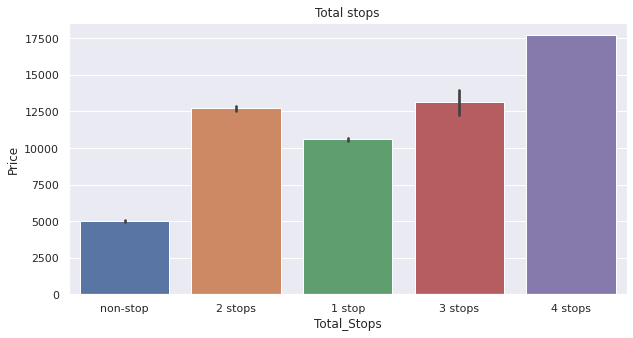

In [ ]:
# plotting Price Vs Total stops

sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Total_Stops", y="Price", data=Data)
plt.title('Total stops')

In [ ]:
# Assigning numerical values to stops

df.Total_Stops.replace(['non-stop','1 stop', '2 stops', '3 stops', '4 stops'], [0,1, 2, 3, 4], inplace=True)

df["Total_Stops"] = df["Total_Stops"].astype(int)

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662


In [ ]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

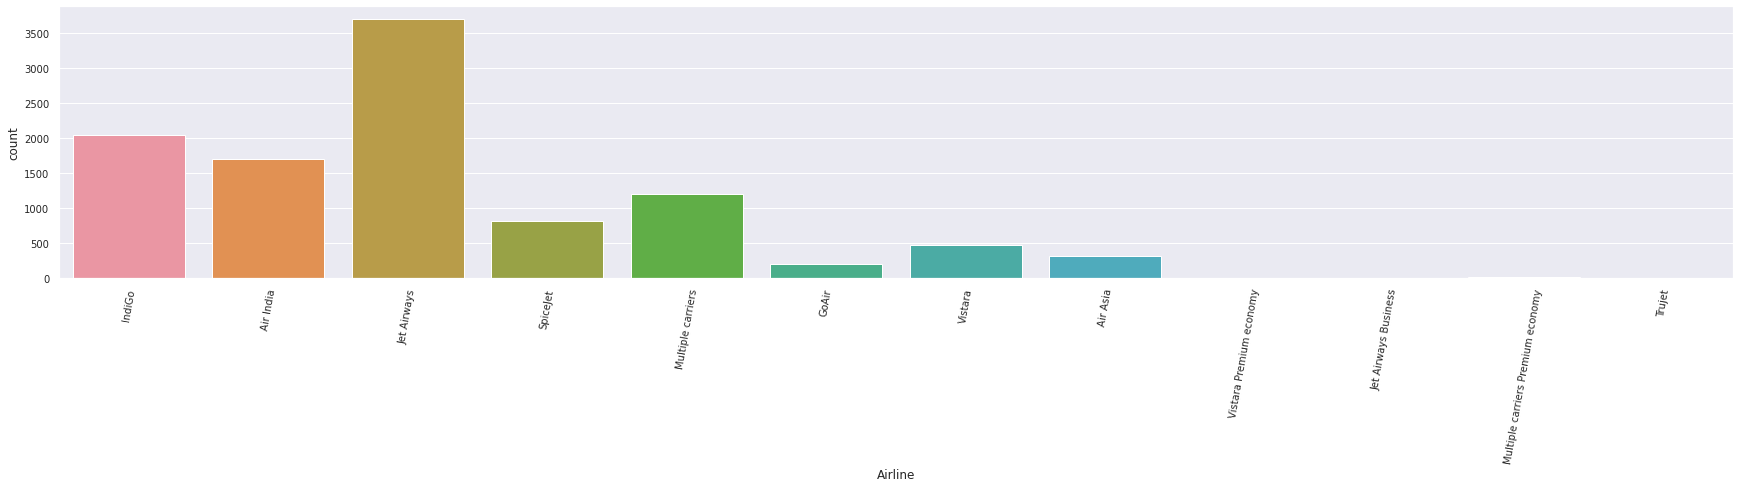

In [ ]:
#plotting Count of all available Airlines in dataset

plt.figure(figsize=(30,5))
sns.countplot(x = 'Airline',data =df)
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

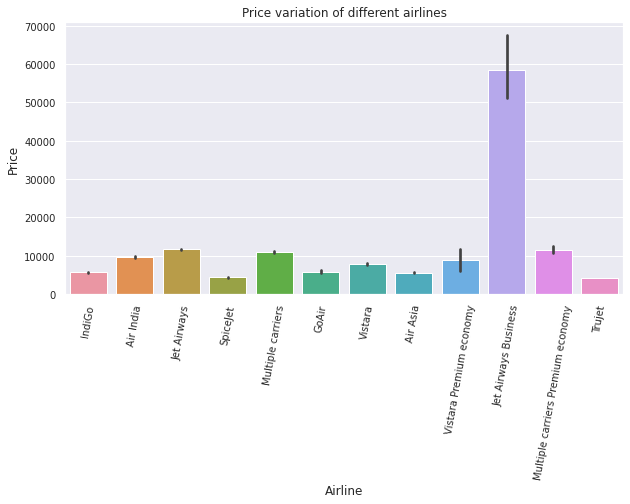

In [ ]:
#Plotting Price variation of Different Airlines

sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Airline", y="Price", data=Data)
plt.title('Price variation of different airlines')
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airlines= pd.get_dummies(df[['Airline']],prefix="Airline",drop_first=True)
Airlines.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df=pd.concat([df,Airlines],axis=1)
df.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0


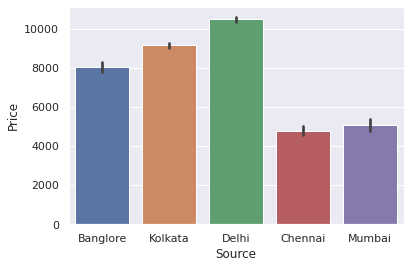

In [ ]:
#Plotting price Vs Source of the flight

sns.barplot(y = 'Price',x = 'Source',data =df)

In [ ]:

Source = pd.get_dummies(df[["Source"]],prefix='Source',drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
df=pd.concat([df,Source],axis=1)
df.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:

Destination = pd.get_dummies(df[["Destination"]],prefix='Dest', drop_first = True)

Destination.head()

,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
df=pd.concat([df,Destination],axis=1)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:

df.drop(["Airline","Source","Destination"], axis = 1, inplace = True)

In [ ]:
# Route and Total_Stops are related to each other so drop it as well

df.drop(["Route"], axis = 1, inplace = True)

In [ ]:
df.shape

(10462, 27)

In [ ]:

# Extract day and month of journey from the dataset

df["Day_of_Week"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df["Day_Of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df["Month_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.month


In [ ]:
df.head(2)

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sunday,24,3
1,1/05/2019,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Wednesday,1,5


In [ ]:
# Drop original feature from  dataset 

df.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [ ]:
#  Arrival time 

df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Hour'] = df['Arrival_Time'] .str.split(':').str[0]
df['Arrival_Minute'] =df['Arrival_Time'] .str.split(':').str[1]
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df=df.drop(['Arrival_Time'],axis=1)

In [ ]:
#  Departure Time
df['Departure_Hour'] = df['Dep_Time'] .str.split(':').str[0]
df['Departure_Minute'] =df['Dep_Time'] .str.split(':').str[1]
df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Departure_Minute']=df['Departure_Minute'].astype(int)
df=df.drop(['Dep_Time'],axis=1)

In [ ]:
df.head(2)

,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sunday,24,3,1,10,22,20
1,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Wednesday,1,5,13,15,5,50


In [ ]:
# Duration column

df['Duration_hour']=df.Duration.str.split(' ').str[0]
df['Duration_min']=df.Duration.str.split(' ').str[1]
df['Dur_hour']=df.Duration_hour.str.split('h').str[0]
df['Dur_min']=df.Duration_min.str.split('m').str[0]
df['Dur_min'].fillna("0",inplace=True)
df['Dur_hour'].fillna("0",inplace=True)
df['Dur_hour']=df['Dur_hour'].replace('5m','0')
df['Dur_hour']=df['Dur_hour'].astype(int)
df['Dur_min']=df['Dur_min'].astype(int)
df['Total_Duration']=df['Dur_hour']*60+df['Dur_min']


In [ ]:
df.head(2)

,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_min,Dur_hour,Dur_min,Total_Duration
0,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sunday,24,3,1,10,22,20,2h,50m,2,50,170
1,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Wednesday,1,5,13,15,5,50,7h,25m,7,25,445


In [ ]:
df.drop(columns=['Duration','Duration_hour','Duration_min','Dur_hour','Dur_min'],inplace=True)
df.head(2)

,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Total_Duration
0,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sunday,24,3,1,10,22,20,170
1,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Wednesday,1,5,13,15,5,50,445


In [ ]:
print("Dataset:\n",df["Additional_Info"].value_counts())

Dataset:
 No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


In [ ]:
# replacing repeating value in train set

df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

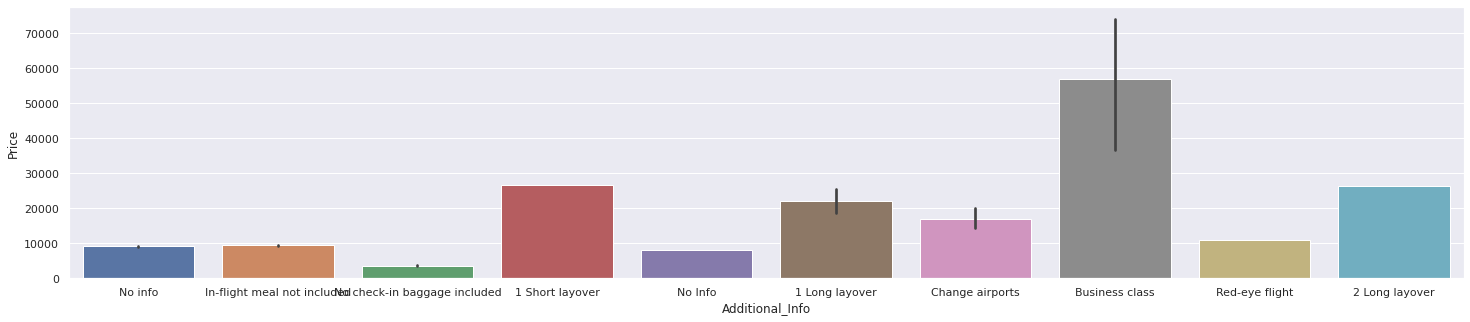

In [ ]:
#Plotting price Vs given additional info

figure(figsize=(25,5)) 

sns.barplot(y = 'Price',x= 'Additional_Info',data=Data)

In [ ]:
df["Additional_Info"].replace(to_replace={'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',
                                                        '1 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [ ]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Day_of_Week"]=encoder.fit_transform(df['Day_of_Week'])
df['Additional_Info']=encoder.fit_transform(df['Additional_Info'])

In [ ]:
df.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Dest_Cochin', 'Dest_Delhi', 'Dest_Hyderabad', 'Dest_Kolkata',
       'Dest_New Delhi', 'Day_of_Week', 'Day_Of_Journey', 'Month_of_Journey',
       'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute',
       'Total_Duration'],
      dtype='object')

In [ ]:
final_df=df.copy()

#Model Selection and Predictions

In [ ]:
price=final_df['Price']

features=final_df.drop(columns=['Price'])


In [ ]:
price.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [ ]:
features.head(2)

,Total_Stops,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Total_Duration
0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,24,3,1,10,22,20,170
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,5,13,15,5,50,445


In [ ]:
# splitting the training dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(features,price,test_size=0.25,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7846, 30)
(7846,)
(2616, 30)
(2616,)


In [ ]:
#function for plotting report

from sklearn import metrics

def print_accuracy_report(y_test, y_pred,X_test, model):
  print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('Root Mean Squared Log Error',np.sqrt(metrics.mean_squared_log_error( y_test, y_pred )))

In [ ]:
# Finding Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)

[2.27966264e-01 8.16608053e-02 1.19220255e-02 1.72867365e-03
 1.35250807e-02 1.32501837e-01 8.73574245e-02 2.11496558e-02
 7.84183067e-04 2.93614600e-03 1.60458433e-04 5.11633993e-03
 1.77812823e-04 3.87324653e-04 1.15378180e-02 4.17627361e-03
 5.24970151e-03 7.00375229e-03 1.32262288e-02 5.49738486e-03
 4.36926118e-04 2.39983631e-02 2.96973401e-02 7.51919194e-02
 4.56205072e-02 2.59253163e-02 1.83480940e-02 2.15468923e-02
 2.17856453e-02 1.03383806e-01]


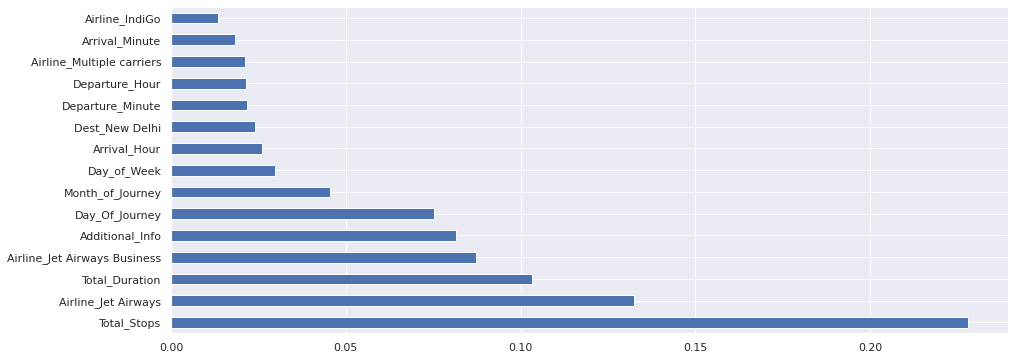

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (15,6))
feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
#using random forest regressor

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

random_forest_regressor=RandomForestRegressor()


In [ ]:
#parameter for randomized search

n_estimators = [100,200,300,400,500]
max_depth = [5,10,15,20,30,40]
min_samples_split=[5,10,15,20,30,40]
min_samples_leaf=[5,10,15,20,30,40]

In [ ]:
hyperparameter_rfr = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }

In [ ]:
rfr_cv =  RandomizedSearchCV(random_forest_regressor,hyperparameter_rfr,cv=5,n_jobs = -1,verbose = 5,scoring ='neg_mean_squared_log_error',n_iter=10)

In [ ]:
rfr_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rfr_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_rfr = rfr_cv.best_estimator_.predict(x_test)

print(print_accuracy_report(y_test, y_pred_rfr, x_test, rfr_cv.best_estimator_))

R Squared(Accuracy) 0.8515479301499269
Root Mean Squared Error: 1774.3029403480639
Root Mean Squared Log Error 0.15401157220349176
None


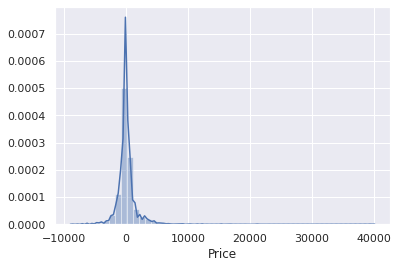

In [ ]:
sns.distplot(y_test-y_pred_rfr)

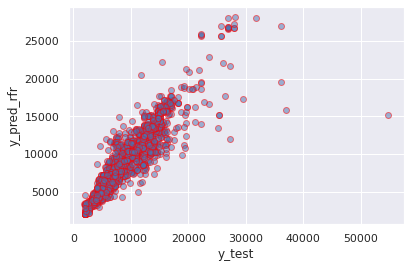

In [ ]:
#plotting predicted value Vs Actual Value
plt.scatter(y_test, y_pred_rfr, alpha = 0.5,edgecolors='red')
plt.xlabel("y_test")
plt.ylabel("y_pred_rfr")
plt.show()

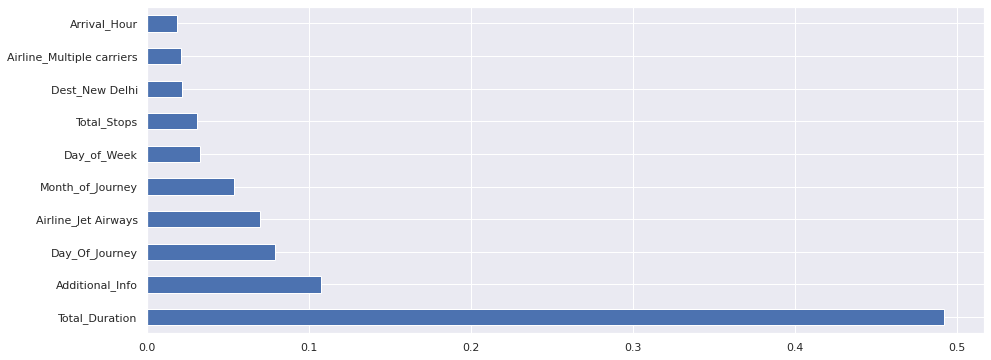

In [ ]:
plt.figure(figsize = (15,6))
feat_importances = pd.Series(rfr_cv.best_estimator_.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Saving the model to reuse it again**

In [ ]:
import pickle

pickle.dump(rfr_cv.best_estimator_,open('FFP_model_final.pkl','wb'))
